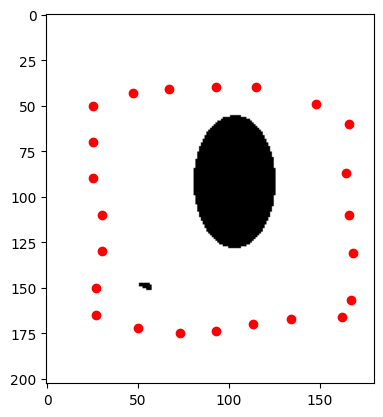

In [1]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.segmentation import active_contour
from IPython.display import display, clear_output
import time

# read image
image = cv2.imread('SampleImage.png', cv2.IMREAD_GRAYSCALE)

# select points along the object boundary
points = np.array([(25, 50),
                   (25, 70),
                    (25, 90),
                    (30, 110),
                    (30, 130),
                    (27, 150),
                    (27, 165),
                    (50, 172),
                    (73, 175),
                    (93, 174),
                    (113, 170),
                    (134, 167),
                    (162, 166),
                    (167, 157),
                    (168, 131),
                    (166, 110),
                    (164, 87),
                    (166, 60),
                    (148, 49),
                    (115, 40),
                    (93, 40),
                    (67, 41),
                    (47, 43)
                   ])

# Create initial contour
s = np.linspace(0, 2*np.pi, 100)
r = 100 + 100*np.sin(s)
c = 100 + 100*np.cos(s)
init = np.array([r, c]).T

# show points on image
plt.imshow(image, cmap='gray')
plt.scatter(points[:, 0], points[:, 1], c='r')
plt.show()

# uses PIL library to display the image with points at each iteration
# points are black dots so they may be rather hard to see.
# in that case, raise SCALE value

def showImageAtIteration(points, image):
    # increase +=1 to make the image bigger
    SCALE = 2

    clear_output(wait=True)
    img = Image.fromarray(image)
    for point in points:
        img.putpixel((point[0].astype(int), point[1].astype(int)), 0)  # Red color for contour points
    img = img.resize((image.shape[1]*SCALE, image.shape[0]*SCALE), resample=Image.NEAREST)
    display(img)
    img.close()

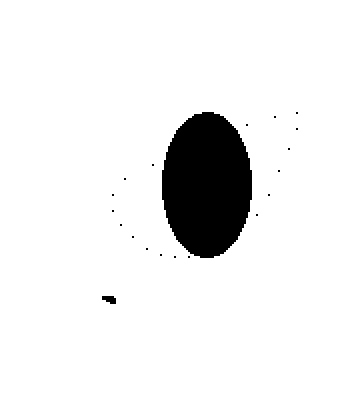

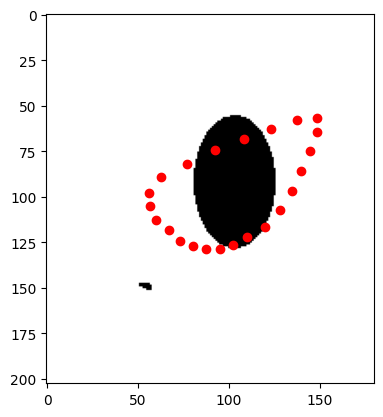

In [2]:
max_iter = 200
iter = 0

# params
ALPHA = 0.01
BETA = 0.01
GAMMA = 0.1

while iter < max_iter:
    iter+=1
    snake = active_contour(image, points, max_num_iter=1,
                           alpha=ALPHA, 
                           beta=BETA, 
                           gamma=GAMMA
                           )
    points = snake
    showImageAtIteration(points, image)
    time.sleep(0.01)

# show final
plt.imshow(image, cmap='gray')
plt.scatter(points[:, 0], points[:, 1], c='r')
plt.show()